In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from pandas.plotting import scatter_matrix

In [59]:
df = pd.read_csv('C:\\Users\\Ufuk Altan\\Desktop\\School\\Semester1\\MarketingAnalysis\\data\\heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Preprocess

In [60]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [61]:
df.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
              'resting_electrocardiographic_results', 'max_heart_rate','exercise_induced_angina', 'oldpeak', 
              'slope', '#major_vessels', 'thal', 'target']

In [62]:
sex = {1 : 'Male', 0 : 'Female'}
chest_pain = {0 : 'typical angina', 1 : 'atypical angina', 2 : 'non-anginal pain', 3 : 'asymptomatic'}
fasting_blood_sugar = {0 : '> 120 mg/dl', 1 : '< 120 mg/dl'}
slope = {0 : 'upsloping', 1 : 'flat', 2 : 'downsloping'}
thal = {0: 'normal', 1: 'normal' , 2 : 'reversable defect', 3 : 'fixed defect'}

In [63]:
df['sex'] = df['sex'].replace(sex)
df['chest_pain'] = df['chest_pain'].replace(chest_pain)
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace(fasting_blood_sugar)
df['slope'] = df['slope'].replace(slope)
df['thal'] = df['thal'].replace(thal)

In [64]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,oldpeak,slope,#major_vessels,thal,target
0,63,Male,asymptomatic,145,233,< 120 mg/dl,0,150,0,2.3,upsloping,0,normal,1
1,37,Male,non-anginal pain,130,250,> 120 mg/dl,1,187,0,3.5,upsloping,0,reversable defect,1
2,41,Female,atypical angina,130,204,> 120 mg/dl,0,172,0,1.4,downsloping,0,reversable defect,1
3,56,Male,atypical angina,120,236,> 120 mg/dl,1,178,0,0.8,downsloping,0,reversable defect,1
4,57,Female,typical angina,120,354,> 120 mg/dl,1,163,1,0.6,downsloping,0,reversable defect,1


In [65]:
def countplot_percentages(data, IV, DV):
    """
    Pass in dataframe, one independent and one dependent variable. 
    They both should be categorical data and there should be no null values in the dataset
    """
    try:
        for iv_val in data[IV].unique(): 
            for dv_val in data[DV].unique():

                value = data[data[IV] == iv_val][DV].value_counts()[dv_val]
                print(f'{iv_val} {dv_val} Percentage --> {100 * value / (data[IV].value_counts()[iv_val])}')
    except KeyError:
        pass
    
def return_feature_importances(model):

    """
    Pass in the tree model variable
    """

    importances = model.feature_importances_
    features = pd.DataFrame({'Features':X.columns, 'Importances': importances})
    features = features.sort_values('Importances', ascending = False)
    
    plt.figure(figsize = (16,6))
    sns.barplot(x= 'Features', y ='Importances', data = features)
    plt.xticks(rotation = 90)
    
    return features


# Exploratory Data Analysis

Text(0, 0.5, 'Slope')

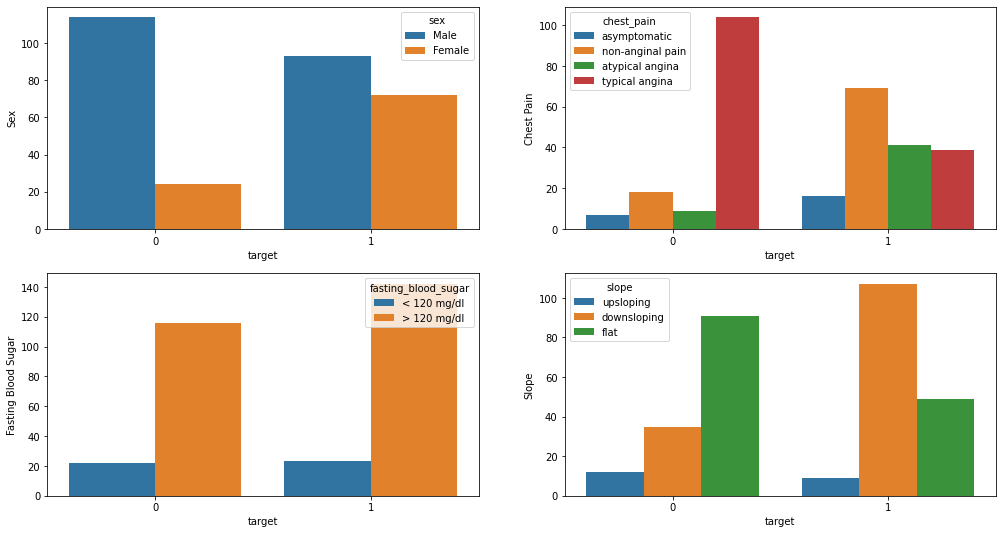

In [66]:
plt.figure(figsize = (17, 9))

plt.subplot(2,2,1)
sns.countplot(x = 'target', hue = 'sex', data = df)
plt.ylabel('Sex')

plt.subplot(2,2,2)
sns.countplot(x = 'target', hue = 'chest_pain', data = df)
plt.ylabel('Chest Pain')

plt.subplot(2,2,3)
sns.countplot(x = 'target', hue = 'fasting_blood_sugar', data = df)
plt.ylabel('Fasting Blood Sugar')

plt.subplot(2,2,4)
sns.countplot(x = 'target', hue = 'slope', data = df)
plt.ylabel('Slope')

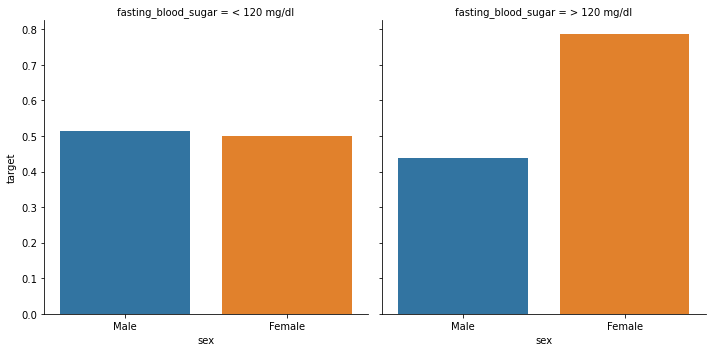

In [67]:
sns.catplot(x="sex", y="target", col="fasting_blood_sugar", data=df, kind = 'bar', ci=None)

In [68]:
countplot_percentages(df, 'sex', 'target'),
print('\n')
countplot_percentages(df, 'chest_pain', 'target')
print('\n')
countplot_percentages(df, 'fasting_blood_sugar', 'target')
print('\n')
countplot_percentages(df, 'slope', 'target')

Male 1 Percentage --> 44.927536231884055
Male 0 Percentage --> 55.072463768115945
Female 1 Percentage --> 75.0
Female 0 Percentage --> 25.0


asymptomatic 1 Percentage --> 69.56521739130434
asymptomatic 0 Percentage --> 30.434782608695652
non-anginal pain 1 Percentage --> 79.3103448275862
non-anginal pain 0 Percentage --> 20.689655172413794
atypical angina 1 Percentage --> 82.0
atypical angina 0 Percentage --> 18.0
typical angina 1 Percentage --> 27.272727272727273
typical angina 0 Percentage --> 72.72727272727273


< 120 mg/dl 1 Percentage --> 51.111111111111114
< 120 mg/dl 0 Percentage --> 48.888888888888886
> 120 mg/dl 1 Percentage --> 55.03875968992248
> 120 mg/dl 0 Percentage --> 44.96124031007752


upsloping 1 Percentage --> 42.857142857142854
upsloping 0 Percentage --> 57.142857142857146
downsloping 1 Percentage --> 75.35211267605634
downsloping 0 Percentage --> 24.64788732394366
flat 1 Percentage --> 35.0
flat 0 Percentage --> 65.0


<AxesSubplot:xlabel='target', ylabel='max_heart_rate'>

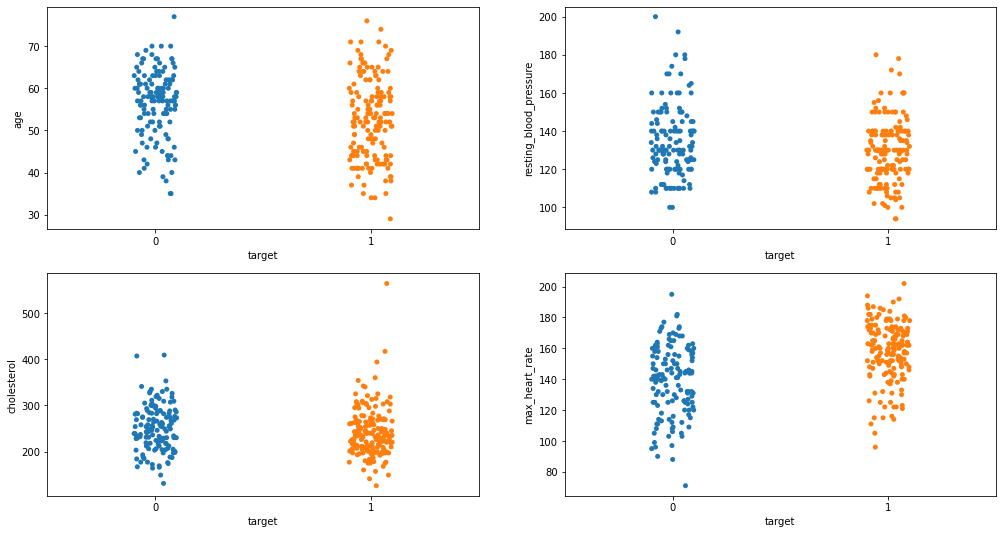

In [69]:
plt.figure(figsize = (17, 9))

plt.subplot(2,2,1)
sns.stripplot(x = 'target', y = 'age', data = df)

plt.subplot(2,2,2)
sns.stripplot(x = 'target', y = 'resting_blood_pressure', data = df)

plt.subplot(2,2,3)
sns.stripplot(x = 'target', y = 'cholesterol', data = df)

plt.subplot(2,2,4)
sns.stripplot(x = 'target', y = 'max_heart_rate', data = df)

In [70]:
from scipy.stats.stats import pearsonr
pearsonr(df['cholesterol'], df['target'])

(-0.0852391051375691, 0.13879032695601176)

In [71]:
from scipy.stats.stats import pearsonr
pearsonr(df['max_heart_rate'], df['target'])

(0.42174093381067457, 1.6973376386561237e-14)

In [72]:
df.describe()

,age,resting_blood_pressure,cholesterol,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,oldpeak,#major_vessels,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.528053,149.646865,0.326733,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,0.525860,22.905161,0.469794,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,1.000000,153.000000,0.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,1.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,2.000000,202.000000,1.000000,6.200000,4.000000,1.000000


In [73]:
df['age'].mean()

54.366336633663366

In [74]:
df[df['age'] > 54]['target'].value_counts()

0    94
1    65
Name: target, dtype: int64

In [75]:
df['resting_blood_pressure'].mean()

131.62376237623764

In [76]:
df[df['resting_blood_pressure'] > 131]['target'].value_counts()

0    67
1    65
Name: target, dtype: int64

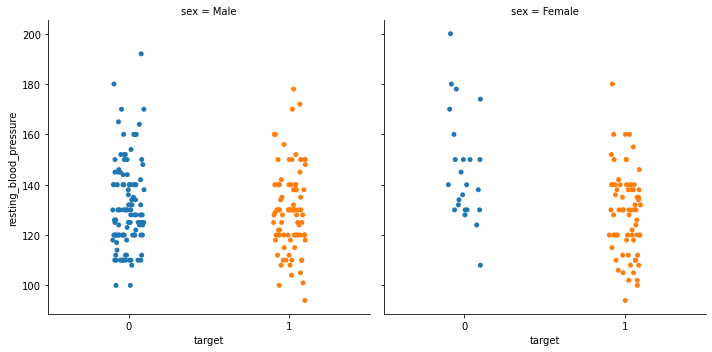

In [77]:
sns.catplot(x="target", y="resting_blood_pressure", col="sex", data=df, kind = 'strip', ci=None)

Text(0, 0.5, 'Age')

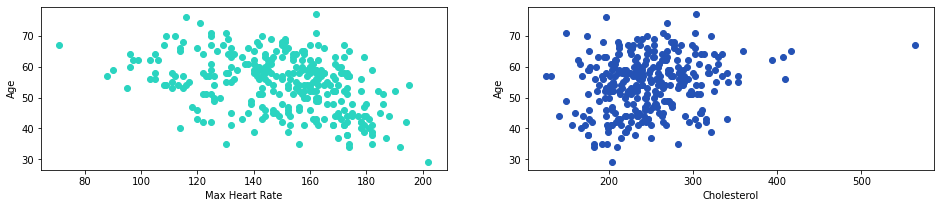

In [78]:
plt.figure(figsize = (16,3))

plt.subplot(1,2,1)
plt.scatter(df['max_heart_rate'], df['age'], color = '#2ad4c0')
plt.xlabel('Max Heart Rate')
plt.ylabel('Age')

plt.subplot(1,2,2)
plt.scatter(df['cholesterol'], df['age'], color = '#2452b5')
plt.xlabel('Cholesterol')
plt.ylabel('Age')

In [79]:
labels = ['age', 'rbp', 'cholesterol', 'rer', 'max_heart_rate', 'eia', 'oldpeak', '#major_vessels', 'target']

<AxesSubplot:>

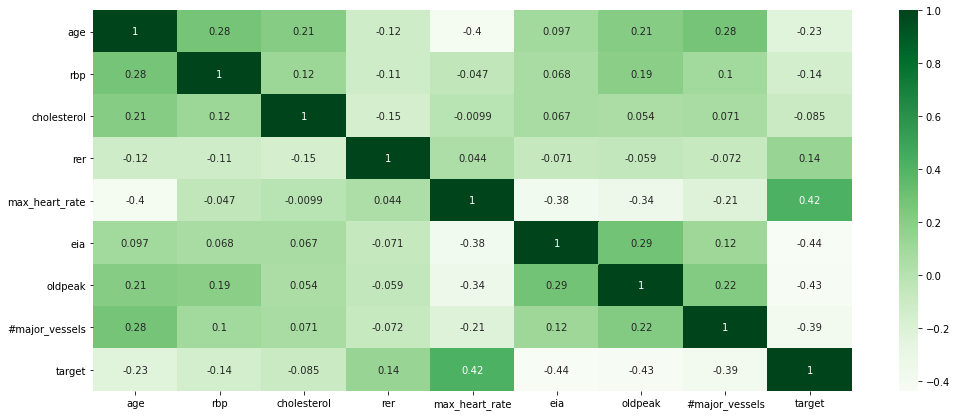

In [80]:
plt.figure(figsize = (17,7))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens', xticklabels = labels, yticklabels = labels)

In [81]:
#df.corr().to_excel(r'C:\Users\Ufuk Altan\Desktop\School\Semester1\MarketingAnalysis\data\heart_corr.xlsx', header=True)

# Normality & Homoscedasticity

In [82]:
values = [val for val in df.skew()]
skewness = pd.DataFrame({'Feature':list(df.skew().keys()), 'Skewness': values})
skewness

,Feature,Skewness
0,age,-0.202463
1,resting_blood_pressure,0.713768
2,cholesterol,1.143401
3,resting_electrocardiographic_results,0.162522
4,max_heart_rate,-0.537410
5,exercise_induced_angina,0.742532
6,oldpeak,1.269720
7,#major_vessels,1.310422
8,target,-0.179821


In [ ]:
skewness.to_excel(r'C:\Users\Ufuk Altan\Desktop\School\Semester1\MarketingAnalysis\data\skewness2.xlsx', header=True)

Text(0.5, 0, 'Log Resting Blood Pressure')

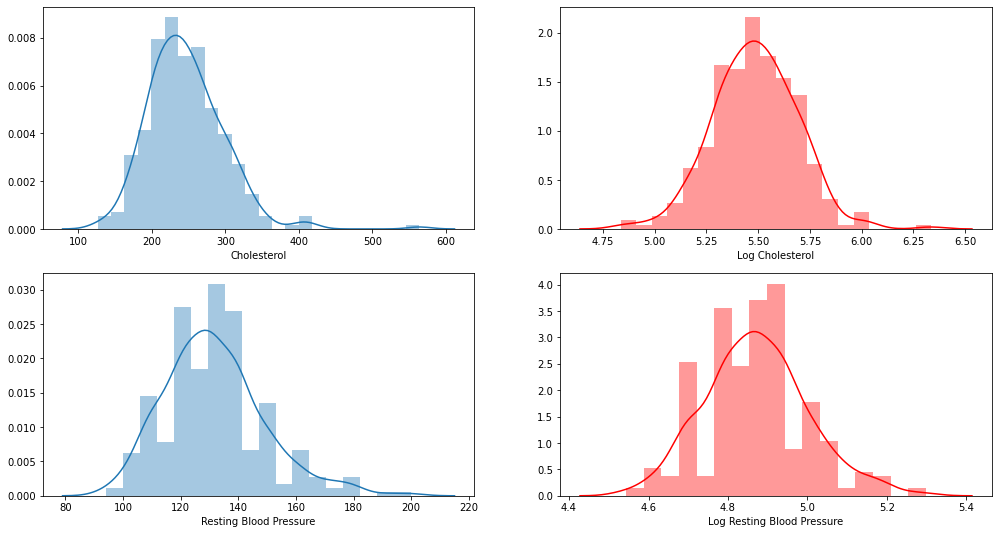

In [83]:
plt.figure(figsize = (17, 9))

plt.subplot(2,2,1)
sns.distplot(df['cholesterol'])
plt.xlabel('Cholesterol')

plt.subplot(2,2,2)
sns.distplot(list(np.log(df['cholesterol'])), color = 'r')
plt.xlabel('Log Cholesterol')

plt.subplot(2,2,3)
sns.distplot(df['resting_blood_pressure'])
plt.xlabel('Resting Blood Pressure')

plt.subplot(2,2,4)
sns.distplot(list(np.log(df['resting_blood_pressure'])), color = 'r')
plt.xlabel('Log Resting Blood Pressure')

In [84]:
df['rbp_log'] = np.log(df['resting_blood_pressure'])
df['cho_log'] = np.log(df['cholesterol'])

Text(0.5, 0, 'Exp oldpeak')

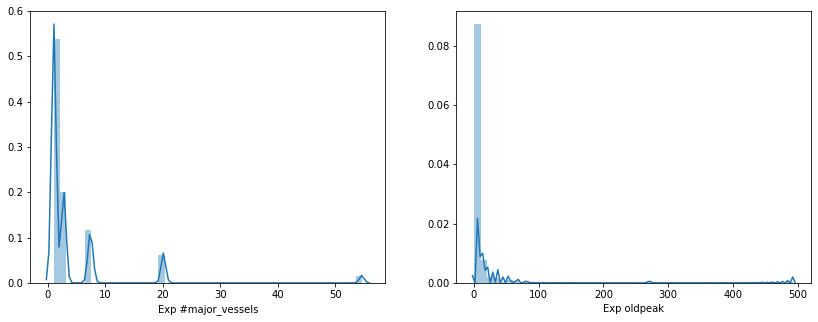

In [85]:
plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
sns.distplot(np.exp(df['#major_vessels']))
plt.xlabel('Exp #major_vessels')

plt.subplot(1,2,2)
sns.distplot(np.exp(df['oldpeak']))
plt.xlabel('Exp oldpeak')

In [86]:
df['#major_vessels'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [87]:
df.skew()

age                                    -0.202463
resting_blood_pressure                  0.713768
cholesterol                             1.143401
resting_electrocardiographic_results    0.162522
max_heart_rate                         -0.537410
exercise_induced_angina                 0.742532
oldpeak                                 1.269720
#major_vessels                          1.310422
target                                 -0.179821
rbp_log                                 0.281757
cho_log                                 0.086667
dtype: float64

In [88]:
df.columns

Index(['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'slope',
       '#major_vessels', 'thal', 'target', 'rbp_log', 'cho_log'],
      dtype='object')

In [89]:
df_dummies = pd.get_dummies(df, drop_first = True)

In [90]:
y = df_dummies['target']
X = df_dummies.drop(['target', 'resting_blood_pressure', 'cholesterol'], axis=1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=39)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Logistic Regression

In [92]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

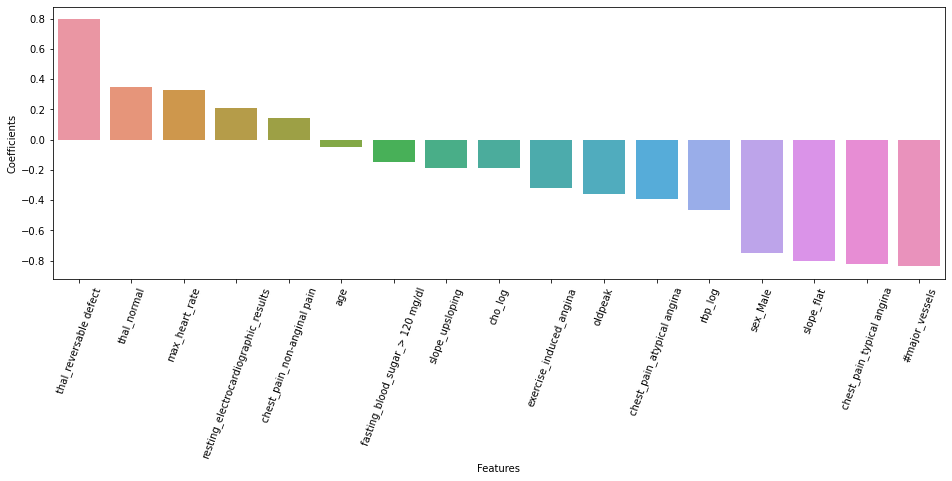

In [93]:
coef = np.reshape(classifier.coef_, (17,))
coefficients = pd.DataFrame({'Features': X.columns, 'Coefficients': coef}).sort_values('Coefficients', ascending = False)

plt.figure(figsize = (16,5))
sns.barplot(x = 'Features', y = 'Coefficients', data = coefficients)
plt.xticks(rotation = 70);

In [94]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

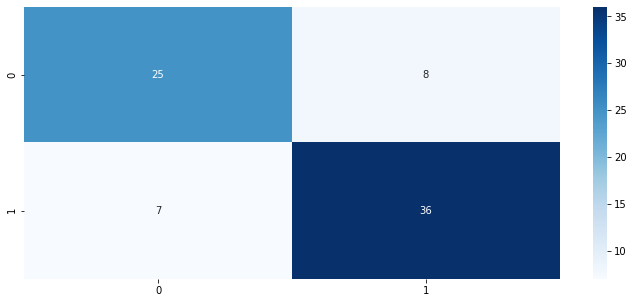

In [96]:
plt.figure(figsize = (12,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Blues')

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.82      0.84      0.83        43

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=15, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [99]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

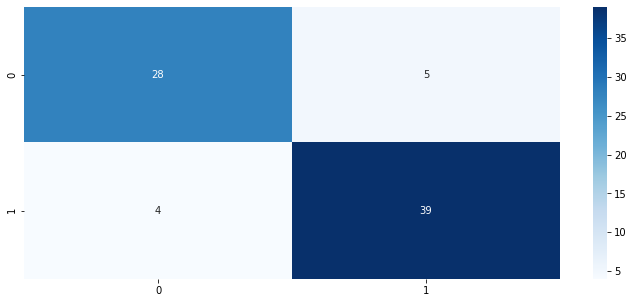

In [101]:
plt.figure(figsize = (12,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Blues')

In [100]:
#Random Forest
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.89      0.91      0.90        43

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [102]:
df_dummies.columns

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'resting_electrocardiographic_results', 'max_heart_rate',
       'exercise_induced_angina', 'oldpeak', '#major_vessels', 'target',
       'rbp_log', 'cho_log', 'sex_Male', 'chest_pain_atypical angina',
       'chest_pain_non-anginal pain', 'chest_pain_typical angina',
       'fasting_blood_sugar_> 120 mg/dl', 'slope_flat', 'slope_upsloping',
       'thal_normal', 'thal_reversable defect'],
      dtype='object')

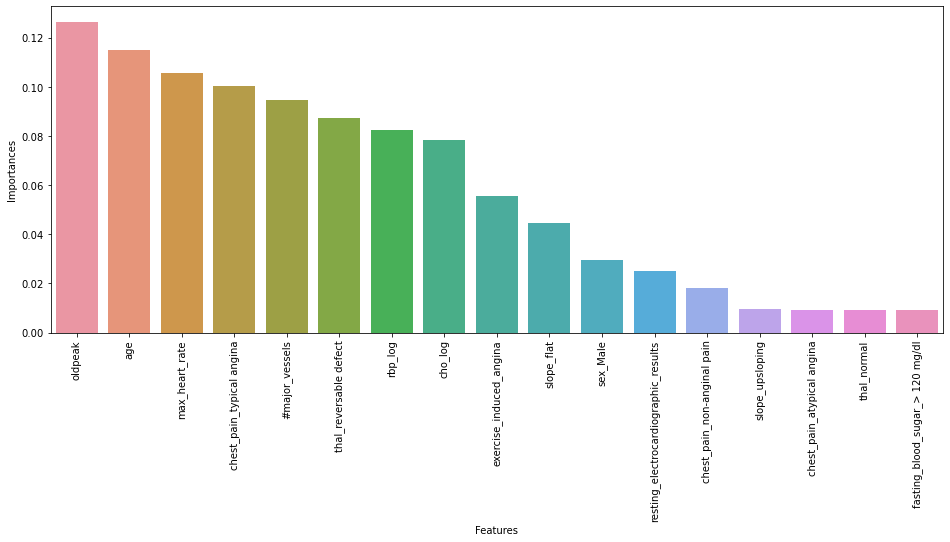

In [103]:
features = return_feature_importances(classifier)

In [104]:
features

,Features,Importances
4,oldpeak,0.126401
0,age,0.115047
2,max_heart_rate,0.105785
11,chest_pain_typical angina,0.100416
5,#major_vessels,0.094646
16,thal_reversable defect,0.087466
6,rbp_log,0.082301
7,cho_log,0.078211
3,exercise_induced_angina,0.055625
13,slope_flat,0.044706


In [ ]:
# Random forest after dropping some variables

In [52]:
dropped = ['resting_blood_pressure', 'cholesterol', 'resting_electrocardiographic_results', 'fasting_blood_sugar']

In [53]:
df = df.drop(dropped, axis=1)
df_dummies = pd.get_dummies(df, drop_first = True)

In [54]:
y = df_dummies['target']
X = df_dummies.drop('target', axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=39)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=15, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.86      0.86      0.86        43

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

